# HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

Dataset Source : [Click Here](https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis)

Penipuan Penyedia Layanan adalah salah satu masalah terbesar yang dihadapi Medicare. Menurut pemerintah, total pengeluaran Medicare meningkat secara eksponensial karena adanya kecurangan dalam klaim Medicare. Penipuan layanan kesehatan adalah kejahatan terorganisir yang melibatkan rekan-rekan penyedia layanan kesehatan, dokter, penerima manfaat yang bekerja sama untuk membuat klaim penipuan.

Analisis yang ketat terhadap data Medicare telah menghasilkan banyak dokter yang terlibat dalam penipuan. Mereka mengadopsi cara-cara di mana kode diagnosis yang ambigu digunakan untuk mengadopsi prosedur dan obat-obatan yang paling mahal. Perusahaan asuransi adalah institusi yang paling rentan terkena dampak dari praktik buruk ini. Karena alasan ini, perusahaan asuransi meningkatkan premi asuransi mereka dan akibatnya perawatan kesehatan menjadi mahal dari hari ke hari.

Penipuan dan penyalahgunaan layanan kesehatan datang dalam berbagai bentuk. Beberapa jenis penipuan yang paling umum dilakukan oleh penyedia layanan kesehatan adalah:

    a) Penagihan untuk layanan yang tidak diberikan.

    b) Pengajuan klaim ganda untuk layanan yang sama.

    c) Menyalahartikan layanan yang diberikan.

    d) Menagih layanan yang lebih kompleks atau mahal daripada yang sebenarnya diberikan.

    e) Menagih layanan yang ditanggung ketika layanan yang diberikan sebenarnya tidak ditanggung.

Pernyataan Masalah
Tujuan dari proyek ini adalah untuk "memprediksi penyedia layanan yang berpotensi melakukan penipuan" berdasarkan klaim yang diajukan oleh mereka. Bersamaan dengan itu, kami juga akan menemukan variabel-variabel penting yang membantu dalam mendeteksi perilaku penyedia layanan yang berpotensi melakukan penipuan. Selanjutnya, kami akan mempelajari pola penipuan dalam klaim penyedia layanan untuk memahami perilaku penyedia layanan di masa depan.

Pengantar Dataset
Untuk tujuan proyek ini, kami mempertimbangkan klaim Rawat Inap, klaim Rawat Jalan, dan rincian Penerima Manfaat dari setiap penyedia layanan. Mari kita lihat rinciannya:

    A) Data Rawat Inap (Inpatient Data)

Data ini memberikan wawasan tentang klaim yang diajukan untuk pasien yang dirawat di rumah sakit. Data ini juga memberikan rincian tambahan seperti tanggal masuk dan keluar serta kode diagnosis.

    B) Data Pasien Rawat Jalan (Outpatient Data)

Data ini memberikan rincian tentang klaim yang diajukan untuk pasien yang mengunjungi rumah sakit dan tidak dirawat di dalamnya.

    C) Data Detail Penerima Manfaat (Beneficiary Details Data)

Data ini berisi rincian KYC penerima manfaat seperti kondisi kesehatan, wilayah tempat tinggal, dll.

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

**Beneficiary**

In [3]:
Test_Beneficiary = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
print(Test_Beneficiary.shape)
Test_Beneficiary.head(3)

(63968, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,2,1,2,1,1,2,1,1,1,2,2,0,0,1170,660


In [4]:
Train_Beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
print(Train_Beneficiary.shape)
Train_Beneficiary.head(3)

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


**Inpatient**

In [5]:
Test_Inpatient = pd.read_csv('Test_Inpatientdata-1542969243754.csv')
print(Test_Inpatient.shape)
Test_Inpatient.head(3)

(9551, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Train_Inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
print(Train_Inpatient.shape)
Train_Inpatient.head(3)

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Outpatient**

In [7]:
Test_Outpatient = pd.read_csv('Test_Outpatientdata-1542969243754.csv')
print(Test_Outpatient.shape)
Test_Outpatient.head(3)

(125841, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,V5861,2724,3182,V5869,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,E9174,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [8]:
Train_Outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
print(Train_Outpatient.shape)
Train_Outpatient.head(3)

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


**Test Train Data**

In [9]:
Train = pd.read_csv('Train-1542865627584.csv')
print(Train.shape)
Train.head(3)

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No


In [10]:
Test = pd.read_csv('Test-1542969243754.csv')
print(Test.shape)
Test.head(3)

(1353, 1)


,Provider
0,PRV51002
1,PRV51006
2,PRV51009


# EDA

## Beneficiary

In [11]:
Train_Beneficiary.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


**Duplicated**

In [12]:
print("Data Duplikat : ", Train_Beneficiary.duplicated().sum())
print("Feature (BeneID) Duplikat : ", Train_Beneficiary.duplicated(subset='BeneID').sum())

Data Duplikat :  0
Feature (BeneID) Duplikat :  0


**Info**

In [13]:
Train_Beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

**Missing Value**

In [14]:
miss_value = pd.DataFrame( data = Train_Beneficiary.isna().sum(), columns={'Jumlah Miising Value'}, index=Train_Beneficiary.columns)
ratio_miss_value = pd.DataFrame(data=round(Train_Beneficiary.isna().sum() / len(Train_Beneficiary) * 100,2), columns={"ratio (%)"})
null = pd.concat([miss_value,ratio_miss_value],axis=1).sort_values(by='ratio (%)')

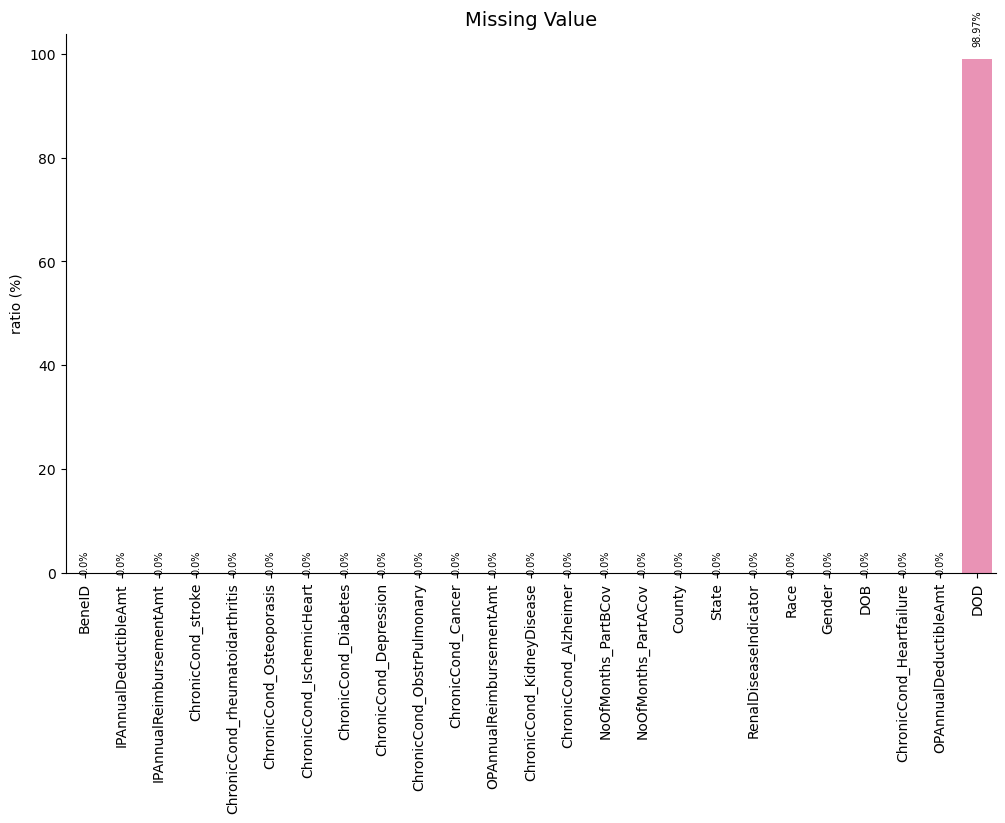

In [15]:
plt.figure(figsize=(12,7))
fig = sns.barplot(data=null, x=null.index, y=null['ratio (%)'])
plt.xticks(rotation=90)
plt.title("Missing Value", fontsize = 14)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(height)+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=7, rotation=90)

**Change An Invalid Data Type**

In [16]:
print("Before\nDtype : ",Train_Beneficiary['DOB'].dtypes)
print("Dtype : ",Train_Beneficiary['DOD'].dtypes)

# DOB (Object > Datetime)
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'])
print("After\nDtype : ",Train_Beneficiary['DOB'].dtypes)

# DOD (Object > Datetime)
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'])
print("Dtype : ",Train_Beneficiary['DOD'].dtypes)

Before
Dtype :  object
Dtype :  object
After
Dtype :  datetime64[ns]
Dtype :  datetime64[ns]


## Inpatient

In [17]:
Train_Inpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Duplicated**

In [18]:
print("Data Duplikat : ", Train_Inpatient.duplicated().sum())
print("Feature (BeneID) Duplikat : ", Train_Inpatient.duplicated(subset='BeneID').sum())
print("Feature (ClaimID) Duplikat : ", Train_Inpatient.duplicated(subset='ClaimID').sum())
print("Feature (Provider) Duplikat : ", Train_Inpatient.duplicated(subset='Provider').sum())

Data Duplikat :  0
Feature (BeneID) Duplikat :  9185
Feature (ClaimID) Duplikat :  0
Feature (Provider) Duplikat :  38382


**Info**

In [19]:
Train_Inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

**Missing Value**

In [20]:
miss_value = pd.DataFrame( data = Train_Inpatient.isna().sum(), columns={'Jumlah Miising Value'}, index=Train_Inpatient.columns)
ratio_miss_value = pd.DataFrame(data=round(Train_Inpatient.isna().sum() / len(Train_Inpatient) * 100,2), columns={"ratio (%)"})
null = pd.concat([miss_value,ratio_miss_value],axis=1).sort_values(by='ratio (%)')

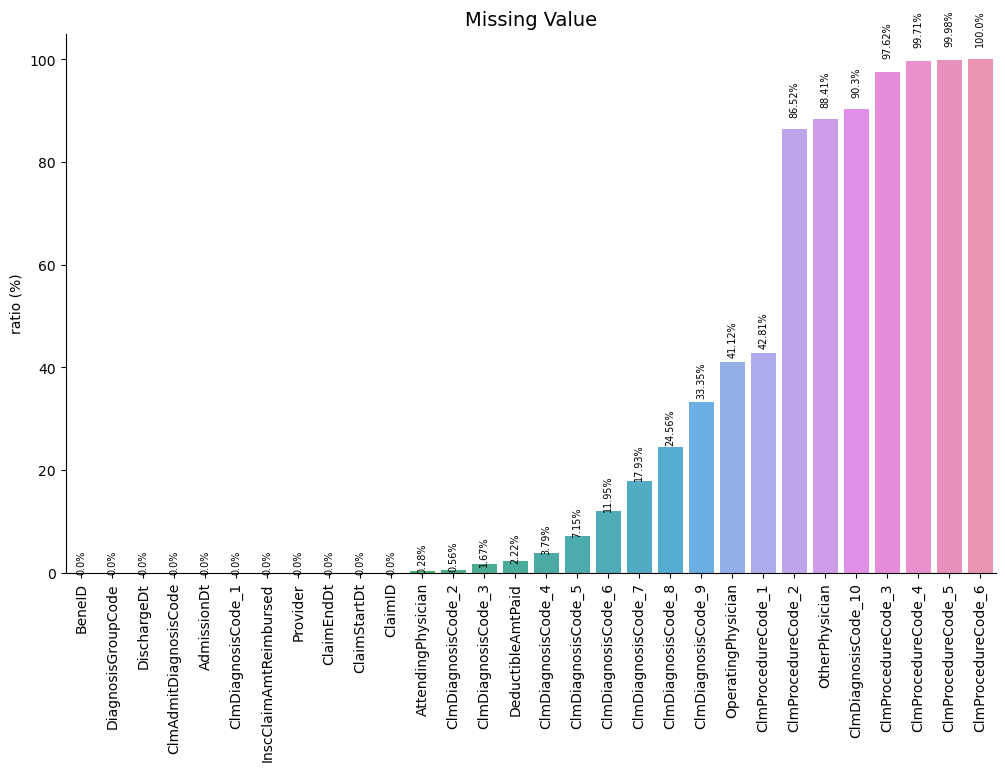

In [21]:
plt.figure(figsize=(12,7))
fig = sns.barplot(data=null, x=null.index, y=null['ratio (%)'])
plt.xticks(rotation=90)
plt.title("Missing Value", fontsize = 14)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(height)+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=7, rotation=90)

**Change An Invalid Data Type**

In [22]:
Train_Inpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# ClaimStartDt  ClaimEndDt  AdmissionDt  DischargeDt (Object > Datetime)

print("Before\nClaimStartDt Dtype \t: ",Train_Inpatient['ClaimStartDt'].dtypes)
print("ClaimEndDt Dtype \t: ",Train_Inpatient['ClaimEndDt'].dtypes)
print("AdmissionDt Dtype \t: ",Train_Inpatient['AdmissionDt'].dtypes)
print("DischargeDt Dtype \t: ",Train_Inpatient['DischargeDt'].dtypes)

Train_Inpatient['ClaimStartDt'] = pd.to_datetime(Train_Inpatient['ClaimStartDt'])
Train_Inpatient['ClaimEndDt'] = pd.to_datetime(Train_Inpatient['ClaimEndDt'])
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'])
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'])

print("After\n\nClaimStartDt Dtype \t: ",Train_Inpatient['ClaimStartDt'].dtypes)
print("ClaimEndDt Dtype \t: ",Train_Inpatient['ClaimEndDt'].dtypes)
print("AdmissionDt Dtype \t: ",Train_Inpatient['AdmissionDt'].dtypes)
print("DischargeDt Dtype \t: ",Train_Inpatient['DischargeDt'].dtypes)

Before
ClaimStartDt Dtype 	:  object
ClaimEndDt Dtype 	:  object
AdmissionDt Dtype 	:  object
DischargeDt Dtype 	:  object
After

ClaimStartDt Dtype 	:  datetime64[ns]
ClaimEndDt Dtype 	:  datetime64[ns]
AdmissionDt Dtype 	:  datetime64[ns]
DischargeDt Dtype 	:  datetime64[ns]


## Outpatient

In [24]:
Train_Outpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


**Duplicated**

In [25]:
print("Data Duplikat : ", Train_Outpatient.duplicated().sum())
print("Feature (BeneID) Duplikat : ", Train_Outpatient.duplicated(subset='BeneID').sum())
print("Feature (ClaimID) Duplikat : ", Train_Outpatient.duplicated(subset='ClaimID').sum())
print("Feature (Provider) Duplikat : ", Train_Outpatient.duplicated(subset='Provider').sum())

Data Duplikat :  0
Feature (BeneID) Duplikat :  383757
Feature (ClaimID) Duplikat :  0
Feature (Provider) Duplikat :  512725


**Info**

In [26]:
Train_Outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

**Missing Value**

In [27]:
miss_value = pd.DataFrame( data = Train_Outpatient.isna().sum(), columns={'Jumlah Miising Value'}, index=Train_Outpatient.columns)
ratio_miss_value = pd.DataFrame(data=round(Train_Outpatient.isna().sum() / len(Train_Outpatient) * 100,2), columns={"ratio (%)"})
null = pd.concat([miss_value,ratio_miss_value],axis=1).sort_values(by='ratio (%)')

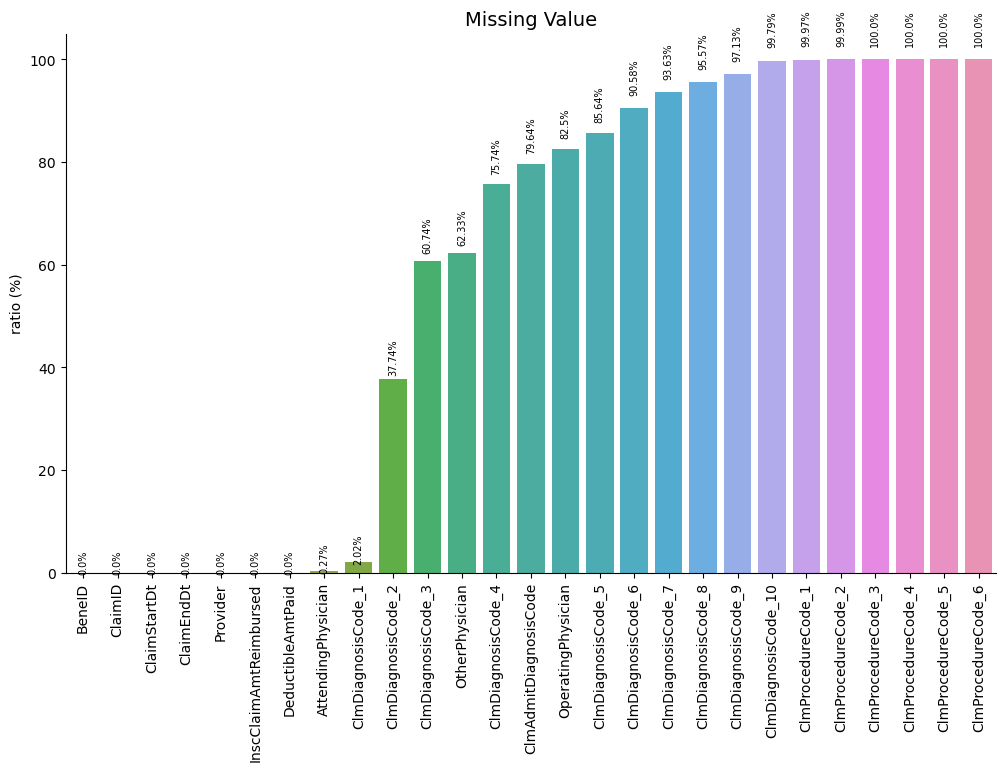

In [28]:
plt.figure(figsize=(12,7))
fig = sns.barplot(data=null, x=null.index, y=null['ratio (%)'])
plt.xticks(rotation=90)
plt.title("Missing Value", fontsize = 14)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(height)+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=7, rotation=90)